# 🖼️ Image Representation and Manipulation Using NumPy Slicing

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### 1. Load and View a Grayscale Image

In [7]:
# Load image in grayscale
img = Image.open("nature.webp").convert("L")  # 'L' mode = grayscale
img_array = np.array(img)
img_array

array([[120, 120, 120, ...,  81,  81,  81],
       [120, 120, 120, ...,  81,  81,  81],
       [120, 120, 120, ...,  81,  81,  81],
       ...,
       [115, 110, 108, ..., 141, 135, 143],
       [ 92,  92,  94, ..., 141, 148, 138],
       [ 79,  86,  98, ..., 133, 140, 129]],
      shape=(1080, 1920), dtype=uint8)

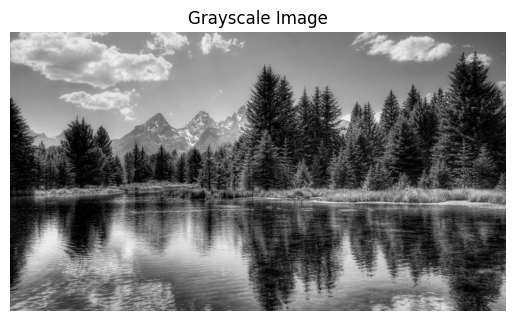

In [8]:
# Display image
plt.imshow(img_array, cmap="gray")
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

In [9]:
# Image properties
print("Shape:", img_array.shape)
print("Data type:", img_array.dtype)
print("Pixel range:", img_array.min(), "-", img_array.max())

Shape: (1080, 1920)
Data type: uint8
Pixel range: 0 - 254


#### 2. 🌞 Brighten the Image (+50)

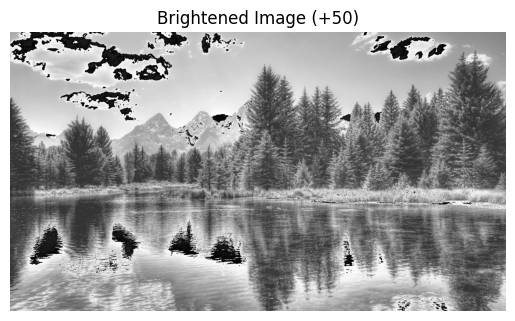

In [11]:
bright_img = img_array + 50
plt.imshow(bright_img, cmap="gray")
plt.title("Brightened Image (+50)")
plt.axis("off")
plt.show()

#### 3. 💡 Add Higher Value (+300)

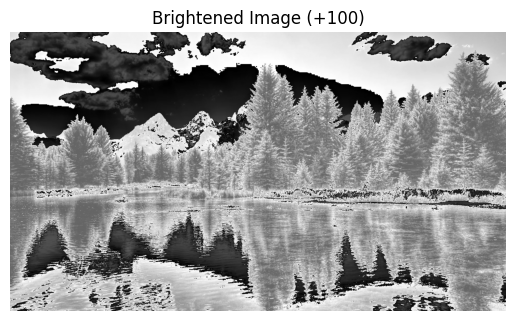

In [16]:
bright_img_100 = img_array + 100
plt.imshow(bright_img_100, cmap="gray")
plt.title("Brightened Image (+100)")
plt.axis("off")
plt.show()

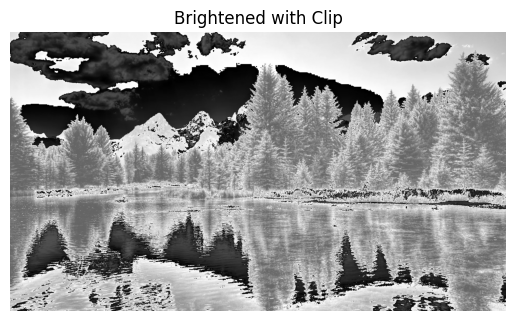

In [17]:
# Correct using np.clip
bright_img_clip = np.clip(img_array + 100, 0, 255)
plt.imshow(bright_img_clip, cmap='gray')
plt.title("Brightened with Clip")
plt.axis('off')
plt.show()

#### 4. 🌒 Subtract to Darken

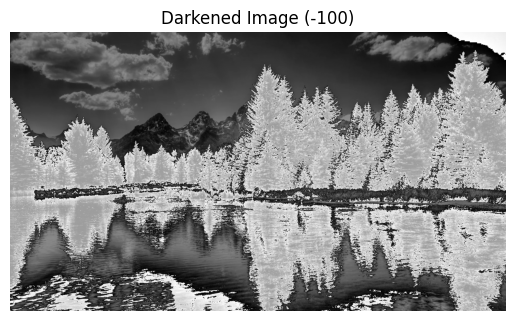

In [18]:
dark_img = img_array - 100
plt.imshow(dark_img, cmap='gray')
plt.title("Darkened Image (-100)")
plt.axis('off')
plt.show()

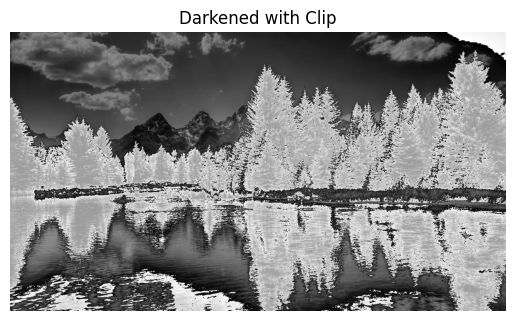

In [19]:
# Fix with clip
dark_img_clip = np.clip(img_array - 100, 0, 255)
plt.imshow(dark_img_clip, cmap='gray')
plt.title("Darkened with Clip")
plt.axis('off')
plt.show()

#### 5. 🔄 Transpose the Image

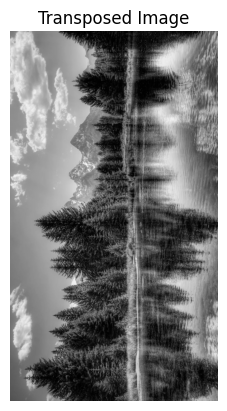

In [20]:
transposed = img_array.T
plt.imshow(transposed, cmap='gray')
plt.title("Transposed Image")
plt.axis('off')
plt.show()

### 6. ↔️↕️ Flip the Image Horizontally and Vertically

#### Horizontally (left–right)

In [22]:
flipped_lr = img_array[:, ::-1]

#### Vertically (up–down)

In [23]:
flipped_ud = img_array[::-1, :]

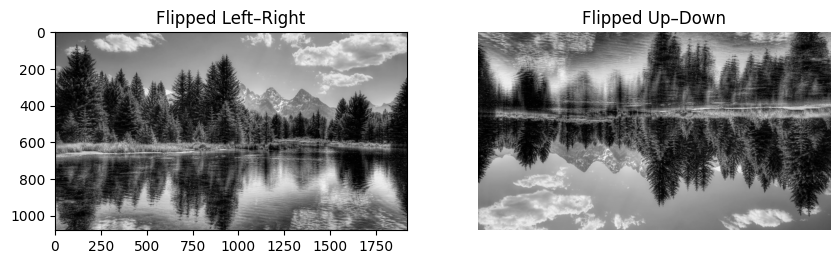

In [24]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(flipped_lr, cmap='gray')
plt.title("Flipped Left–Right")

plt.subplot(1, 2, 2)
plt.imshow(flipped_ud, cmap='gray')
plt.title("Flipped Up–Down")
plt.axis('off')
plt.show()

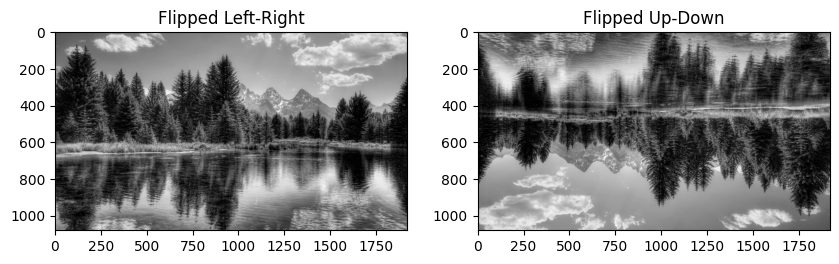

In [21]:
flipped_lr = np.fliplr(img_array)
flipped_ud = np.flipud(img_array)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(flipped_lr, cmap='gray')
plt.title("Flipped Left-Right")

plt.subplot(1, 2, 2)
plt.imshow(flipped_ud, cmap='gray')
plt.title("Flipped Up-Down")
plt.show()

#### 7. ✂️ Slice (Crop) with Slicing

#### Crop 100x100 Center

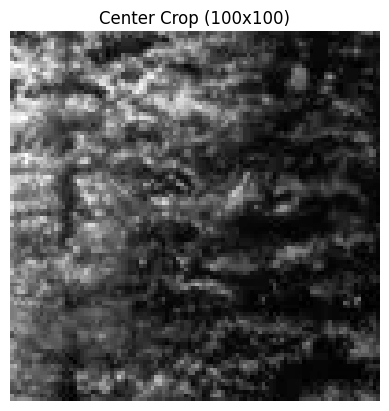

In [25]:
h, w = img_array.shape
crop = img_array[h//2 - 50 : h//2 + 50, w//2 - 50 : w//2 + 50]

plt.imshow(crop, cmap='gray')
plt.title("Center Crop (100x100)")
plt.axis('off')
plt.show()

#### 8. 🎞️ Negative Image (Invert)

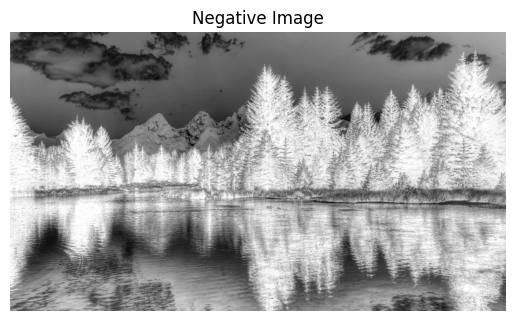

In [27]:
negative = 255 - img_array

plt.imshow(negative, cmap='gray')
plt.title("Negative Image")
plt.axis('off')
plt.show()

#### 9. 🔁 Rotate Image Using Slicing (90° steps)

#### Rotate 90° clockwise

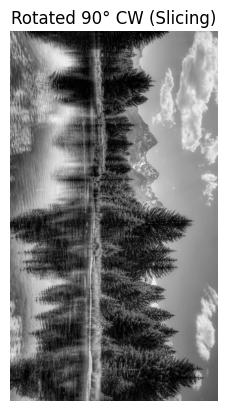

In [28]:
rotate_90_cw = img_array[::-1, :].T
plt.imshow(rotate_90_cw, cmap='gray')
plt.title("Rotated 90° CW (Slicing)")
plt.axis('off')
plt.show()

#### Rotate 90° counter-clockwise

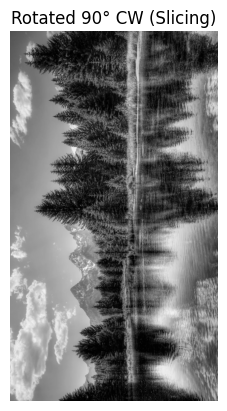

In [29]:
rotate_90_ccw = img_array.T[::-1, :]
plt.imshow(rotate_90_ccw, cmap='gray')
plt.title("Rotated 90° CW (Slicing)")
plt.axis('off')
plt.show()

#### Rotate 180°

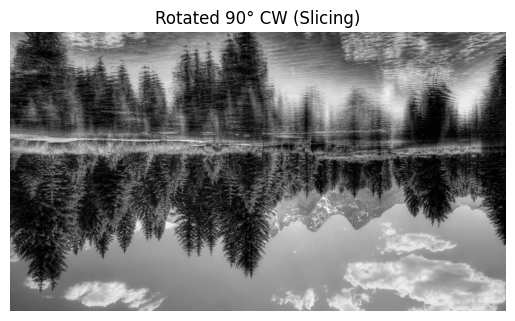

In [30]:
rotate_180 = img_array[::-1, ::-1]
plt.imshow(rotate_180, cmap='gray')
plt.title("Rotated 90° CW (Slicing)")
plt.axis('off')
plt.show()

#### 10. 🔧 Combine Transformations (Slicing Only)

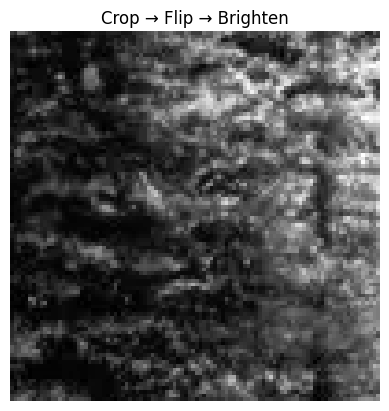

In [31]:
# Step 1: Center crop
crop = img_array[h//2 - 50:h//2 + 50, w//2 - 50:w//2 + 50]

# Step 2: Flip horizontally
flipped = crop[:, ::-1]

# Step 3: Brighten
final = np.clip(flipped + 70, 0, 255)

plt.imshow(final, cmap='gray')
plt.title("Crop → Flip → Brighten")
plt.axis('off')
plt.show()

#### Create a Collage with Slicing

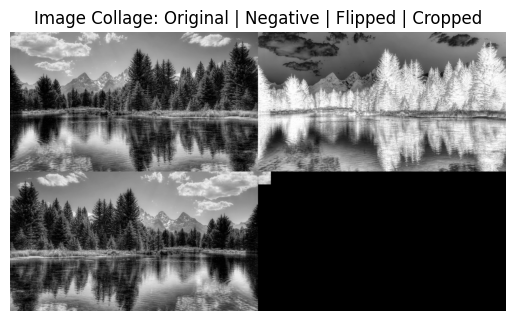

In [32]:
# Downsample by 2 using slicing
downsampled = img_array[::2, ::2]

# Prepare different images
negative = 255 - img_array
flipped = img_array[:, ::-1]
cropped = img_array[:100, :100]

# Resize cropped to match shape using padding (if needed)
crop_padded = np.pad(cropped, ((0, img_array.shape[0] - 100), (0, img_array.shape[1] - 100)), mode='constant')

# Stack images
row1 = np.hstack((img_array, negative))
row2 = np.hstack((flipped, crop_padded))
collage = np.vstack((row1, row2))

plt.imshow(collage, cmap='gray')
plt.title("Image Collage: Original | Negative | Flipped | Cropped")
plt.axis('off')
plt.show()